In [1]:
# import libraries
import numpy as np
import torch
import torch.nn as nn
import copy

import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [3]:
net=nn.Sequential(nn.Linear(2,8),
                  nn.Linear(8,1),
                  nn.Linear(1,1))


In [6]:
net_noseed=copy.deepcopy(net)
for p in net_noseed.named_parameters():
  if 'weight' in p[0]:
    nn.init.xavier_normal_(p[1].data)

In [7]:
net_rs1a=copy.deepcopy(net)
torch.manual_seed(1)
for p in net_rs1a.named_parameters():
  if 'weight' in p[0]:
    nn.init.xavier_normal_(p[1].data)

In [8]:
net_rs2=copy.deepcopy(net)
torch.manual_seed(2)
for p in net_rs2.named_parameters():
  if 'weight' in p[0]:
    nn.init.xavier_normal_(p[1].data)

In [9]:
net_rs1b=copy.deepcopy(net)
torch.manual_seed(1)
for p in net_rs1b.named_parameters():
  if 'weight' in p[0]:
    nn.init.xavier_normal_(p[1].data)

In [20]:
w_ns=np.array([])
w_rs1a=np.array([])
w_rs2=np.array([])
w_rs1b=np.array([])

for i in range(3):
  w_ns=np.append(w_ns,net_noseed[i].weight.view(-1).detach().numpy())
  w_rs1a=np.append(w_rs1a,net_rs1a[i].weight.view(-1).detach().numpy())
  w_rs2=np.append(w_rs2,net_rs2[i].weight.view(-1).detach().numpy())
  w_rs1b=np.append(w_rs1b,net_rs1b[i].weight.view(-1).detach().numpy())
  
w_ns




array([-0.08391079,  0.04751214,  0.48630777,  0.6342991 ,  0.79535693,
        0.14045809, -0.68070257, -0.25936824, -0.24481125,  0.77391464,
        0.14113958, -0.00889272,  0.63964045, -1.02186525,  0.16907948,
        0.07184263, -0.72527879, -0.36230558,  0.72513223, -0.51144296,
        0.03148891, -0.15444933,  0.16846594, -0.48451799,  0.15465878])

In [10]:
net_noseed[1].weight.view(-1).detach().numpy()

array([-0.7252788 , -0.36230558,  0.7251322 , -0.51144296,  0.03148891,
       -0.15444933,  0.16846594, -0.484518  ], dtype=float32)

In [18]:
net_noseed[0].weight.view(-1)

tensor([-0.0839,  0.0475,  0.4863,  0.6343,  0.7954,  0.1405, -0.6807, -0.2594,
        -0.2448,  0.7739,  0.1411, -0.0089,  0.6396, -1.0219,  0.1691,  0.0718],
       grad_fn=<ViewBackward0>)

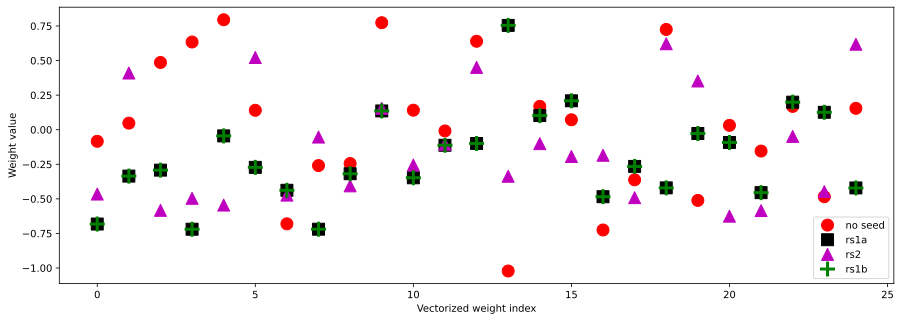

In [22]:
# plotting

fig = plt.figure(figsize=(15,5))

plt.plot(w_ns,'ro',markersize=12,label='no seed')
plt.plot(w_rs1a,'ks',markersize=12,label='rs1a')
plt.plot(w_rs2 ,'m^',markersize=12,label='rs2')
plt.plot(w_rs1b,'g+',markersize=15,label='rs1b',markeredgewidth=3)
plt.legend()
plt.xlabel('Vectorized weight index')
plt.ylabel('Weight value')

plt.show()
     

In [24]:
# the algebraic test

print('1a-1b should be zeros:')
print( w_rs1a-w_rs1b )
print('\n\n')

print('1a-2 should be non-zeros:')
print( w_rs1a-w_rs2 )
print('\n\n')

print('1a-ns should be non-zeros:')
print( w_rs1a-w_ns )
print('\n\n')

1a-1b should be zeros:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]



1a-2 should be non-zeros:
[-0.21680683 -0.74543169  0.29078251 -0.22352022  0.50025801 -0.79460078
  0.03471264 -0.66646316  0.08751756 -0.01855947 -0.09211725 -0.0073103
 -0.55001713  1.09119886  0.20277754  0.40263602 -0.29967313  0.22609788
 -1.04223195 -0.37989978  0.53314489  0.12994796  0.2475912   0.57373706
 -1.03930008]



1a-ns should be non-zeros:
[-0.59835646 -0.383026   -0.77877691 -1.35408258 -0.84015305 -0.41289566
  0.24253508 -0.4602415  -0.07366951 -0.63808604 -0.48876511 -0.10356149
 -0.73904283  1.77636528 -0.06692464  0.13729033  0.24085948  0.09687996
 -1.145762    0.48398356 -0.12365301 -0.30075581  0.03066255  0.61053243
 -0.57585393]



